In [1]:
import pandas as pd
import numpy as np
import re
import tldextract

import warnings
warnings.filterwarnings(category=FutureWarning, action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load Data

In [2]:
full_df = pd.read_pickle('../data/interim/train_df.pkl')

In [3]:
full_df.head()

,url,label
0,http://catholicmom.com/2016/03/15/daily-gospel...,benign
1,http://ceepharmajobs.com/2019/03/,benign
2,https://www.centralisd.com/apps/news/article/1...,benign
3,https://www.ceoutlook.com/2013/04/01/car-stere...,benign
4,http://www.celebzz.com/robots.txt,benign


In [4]:
full_df.shape

(7449443, 2)

In [3]:
df = full_df.sample(100)

# Extract URL parts

# Create Features

## TLD (top level domain) parts

In [17]:
url = df.sample()['url'].values[0]
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [11]:
tld_res = tldextract.extract(url)
tld_res

ExtractResult(subdomain='www', domain='catholiccompany', suffix='com')

In [12]:
type(tld_res)

tldextract.tldextract.ExtractResult

In [13]:
tld_res.subdomain

'www'

In [14]:
tld_res.domain

'catholiccompany'

In [15]:
tld_res.suffix

'com'

In [8]:
df['tld_extract'] = df['url'].map(tldextract.extract)

df['subdomain'] = df['tld_extract'].apply(lambda x: x.subdomain)
df['domain'] = df['tld_extract'].apply(lambda x: x.domain)
df['suffix'] = df['tld_extract'].apply(lambda x: x.suffix)

In [9]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix
6748065,https://www.century21global.com/zh-hk/office/c...,benign,"(www, century21global, com)",www,century21global,com
3375259,https://www.catimini.com/fr-fr/website/40-ling...,benign,"(www, catimini, com)",www,catimini,com
5567924,https://cq.centanet.com/ershoufang-ditie/t4p1h...,benign,"(cq, centanet, com)",cq,centanet,com
528739,https://greenfoottech.catsone.com/careers/3019...,benign,"(greenfoottech, catsone, com)",greenfoottech,catsone,com
3118246,https://bj.centanet.com/ershoufang-ditie/p3a11...,benign,"(bj, centanet, com)",bj,centanet,com


### And their lengths

In [10]:
df['length_url'] = df['url'].map(len)
df['length_domain'] = df['domain'].map(len)

### Number of dots in domain name

In [11]:
df['domain_dots_cnt'] = df['domain'].str.count('.')

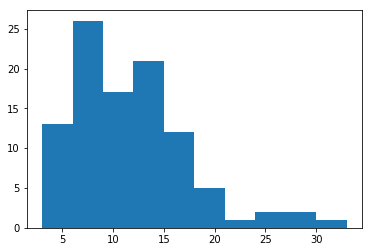

In [12]:
plt.hist(df['domain_dots_cnt']);

In [13]:
df[df['domain_dots_cnt'] == 14].sample(5)[['url', 'domain']]

,url,domain
7249891,https://www.centralilglass.com/robots.txt,centralilglass
5772481,https://centerstageokc.com/robots.txt,centerstageokc
2888314,https://centurynovelty.com/products/man-paper-...,centurynovelty
5785117,http://www.ccbottlecutter.com/umxjz/91438.html,ccbottlecutter
3110306,https://celebestopnews.com/politik/2019/06/set...,celebestopnews


What did this do???

In [102]:
test_domain = df.loc[2167067, 'domain']
test_domain

'cascadecenters'

In [103]:
test_domain.count('.')

0

Try this:

In [14]:
df['domain_dots_cnt'] = df['domain'].apply(lambda s: s.count('.'))

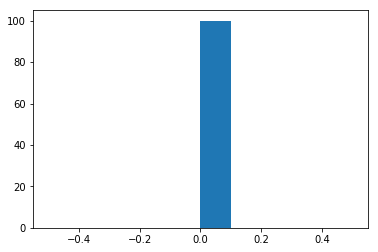

In [15]:
plt.hist(df['domain_dots_cnt']);

In [16]:
df['domain_dots_cnt'].value_counts()

0    100
Name: domain_dots_cnt, dtype: int64

This might not be unreasonable, given that we're only looking at 100 URLs

### Subdomain inds

In [120]:
sd = df.loc[2167067, 'subdomain']
sd

''

In [121]:
sd == ''

True

In [122]:
df['subdomain_null_ind'] = np.where(df['subdomain'] == '', 1, 0)
df['subdomain_www_ind'] = np.where(df['subdomain'] == 'www', 1, 0)

In [123]:
df['subdomain_null_ind'].value_counts()

0    66
1    34
Name: subdomain_null_ind, dtype: int64

In [124]:
df['subdomain_www_ind'].value_counts()

1    50
0    50
Name: subdomain_www_ind, dtype: int64

## Number of slashes in URL

In [17]:
df['url_slashes_cnt'] = df['url'].apply(lambda x: x.count('/'))

In [18]:
df['url_slashes_cnt'].describe()

count    100.000000
mean       4.550000
std        1.520068
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       12.000000
Name: url_slashes_cnt, dtype: float64

In [23]:
i = df.sample().index
print(df.loc[i, 'url'].values[0])
print(df.loc[i, 'url_slashes_cnt'])

https://cbcinews.com/us-visa-process-may-become-simplified-for-indians-key-things-to-know/
2175981    4
Name: url_slashes_cnt, dtype: int64


## Number of digits

In [26]:
digits = re.compile(r'[0-9]')
df['url_digit_cnt'] = df['url'].apply(lambda x: len(re.findall(digits, x)))

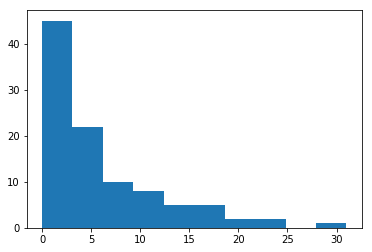

In [27]:
plt.hist(df['url_digit_cnt']);

In [28]:
i = df.sample().index
print(df.loc[i, 'url'].values[0])
print(df.loc[i, 'url_digit_cnt'])

http://www.cbbbg.com/dobavi-firma/52-/2486-.html
1741685    6
Name: url_digit_cnt, dtype: int64


## Subdomain
i.e. HTTP or HTTPS

In [29]:
url = df.sample()['url'].values[0]
url

'https://www.casumo.com/en-nz/play/all-aces-poker/'

In [19]:
url.split('://')[0]

'https'

In [33]:
df['protocol'] = df['url'].apply(lambda x: x.split('://')[0])

In [96]:
df['protocol'].value_counts(dropna=False)

https    70
http     30
Name: protocol, dtype: int64

Since only 2 values, this is essentially Boolean. Encode as such?

## Special Characters

This website lists different kinds of characters in URLs: https://perishablepress.com/stop-using-unsafe-characters-in-urls/

This paper says these are suspicious characters:  _, =, (,), %, & and @.
(https://www.researchgate.net/publication/324014302_Malicious_URLs_Detection_Using_Decision_Tree_Classifiers_and_Majority_Voting_Technique) 

In [62]:
special_chars = re.compile("[$-_.+!*'\(\)\,]")

In [63]:
df['special_char_ind'] = df['url'].apply(lambda x: 1 if re.search(special_chars, x) is not None else 0)

In [64]:
df['special_char_ind'].value_counts()

1    100
Name: special_char_ind, dtype: int64

Not terribly informative

Try anything that's *not* a common character (alphanumeric / : = & _ - . ? .)

In [30]:
special_chars = re.compile('[^a-zA-Z0-9:/=&_\-\.\?]')

In [31]:
url

'https://www.casumo.com/en-nz/play/all-aces-poker/'

In [33]:
print(re.search(special_chars, url))

None


As expected.

In [34]:
df['special_char_ind'] = df['url'].apply(lambda x: 1 if re.search(special_chars, x) is not None else 0)

In [35]:
df['special_char_ind'].value_counts()

0    94
1     6
Name: special_char_ind, dtype: int64

In [36]:
special_df = df[df['special_char_ind'] == 1].sample(5)['url']
special_df

5259594    https://www.cd-chap.com/%D8%AF%D8%B1%D8%A8%D8%...
3522573    http://ceccas.com/sexy-direct-le-en-adolescent...
3825796    https://www.cbssports.com/mlb/teams/stats/SEA/...
4725806    https://search.cctv.com/?qtext=%E8%82%B2%E9%BE%84
4095811       https://www.castorus.com/montpellier,d66537510
Name: url, dtype: object

In [39]:
special_df.iloc[1]

'http://ceccas.com/sexy-direct-le-en-adolescents-mamie-t%C3%A9l%C3%A9phone-cam-cach%C3%A9-porno-mms-cams-salons-montrer-gratuit'

In [40]:
special_df.iloc[2]

'https://www.cbssports.com/mlb/teams/stats/SEA/seattle-mariners/preseason/PIT-BASIC/yearly?/%3F&_3:col_1=12&/&_1:col_1=6&_3:col_1=18&_3:col_2=3&_1:col_1=17&_1:col_2=12'

In [41]:
special_df.iloc[3]

'https://search.cctv.com/?qtext=%E8%82%B2%E9%BE%84'

### Count

In [62]:
special_chars = re.compile("[$-_.+!*'\(\)\,]")

In [167]:
url = df.loc[5790614, 'url']
url

'http://www.certiferme.com/sante/conseil-%C2%AB-etude-de-l-alimentation-totale-%C2%BB-en-france-1-1196.html'

In [170]:
len(re.findall(special_chars, url))

4

In [172]:
df['special_char_cnt'] = df['url'].apply(lambda x: len(re.findall(special_chars, x)))

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <a list of 10 Patch objects>)

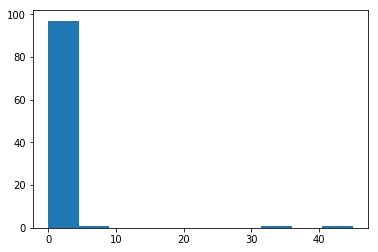

In [175]:
plt.hist(df['special_char_cnt']);

Counting special characters may be more discriminative than a simple indicator

Do the same with "reserved" characters

In [173]:
reserved_chars = re.compile(r'[;/\?:@=&]')

In [177]:
df['reserved_char_cnt'] = df['url'].apply(lambda x: len(re.findall(reserved_chars, x)))

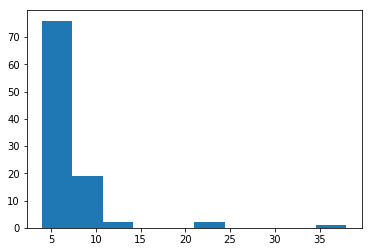

In [178]:
plt.hist(df['reserved_char_cnt']);

## Hex

This post suggests %[A-Z][A-Z] is URL-encoding of hex: https://stackoverflow.com/questions/25222973/weird-characters-in-url

This page confirms that encoding consists of one or more character triplets, starting with `%`, followed by two hexadecimal digis (i.e. [0-9A-Z]): https://www.url-encode-decode.com/

See also: https://en.wikipedia.org/wiki/Percent-encoding

In [92]:
hex_pattern = re.compile("(%[0-9A-F]{2})")

In [81]:
special_url

'https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%9D%91%E7%94%B5%E8%A7%86%E8%89%BA%E6%9C%AF%E8%8A%82'

In [82]:
re.search(hex_pattern, special_url)

<_sre.SRE_Match object; span=(31, 130), match='%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%>

In [93]:
df['hex_pattern_ind'] = df['url'].apply(lambda x: 1 if re.search(hex_pattern, x) is not None else 0)

In [94]:
df['hex_pattern_ind'].value_counts()

0    95
1     5
Name: hex_pattern_ind, dtype: int64

In [95]:
df[df['hex_pattern_ind'] == 1]['url']

2167067    https://cascadecenters.com/index.php?tray=topi...
5790614    http://www.certiferme.com/sante/conseil-%C2%AB...
6909835    https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8...
4393411    https://cuttingtools.ceratizit.com/se/sv/bearb...
4542755    http://www.century21nets.com/name/11/27/27210/...
Name: url, dtype: object

These are the same as the 'special character' URLs. Consider modifying special characters to not include Hex char's

In [115]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0,10
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0,5
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0,4
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0,3


## Path

Ref: https://www.oreilly.com/library/view/regular-expressions-cookbook/9780596802837/ch07s12.html

In [42]:
path_regex = re.compile(r"^([a-z][a-z0-9+\-.]*:(//[^/?#]+)?)?([a-zA-Z0-9\-._~%!$&'()*+,;=:@/]*)")
# path_regex = re.compile(r"([a-z0-9\-._~%!$&'()*+,;=:@/]*)")

In [43]:
test_url = df.sample()['url'].values[0]
test_url

'http://www.catchingfeatures.com/comps/raceinfo.php?raceid=5246'

In [44]:
re.findall(path_regex, test_url)

[('http://www.catchingfeatures.com',
  '//www.catchingfeatures.com',
  '/comps/raceinfo.php')]

In [46]:
re.findall(path_regex, test_url)[0][-1]

'/comps/raceinfo.php'

In [48]:
df['path'] = df['url'].apply(lambda x: re.findall(path_regex, x)[0][-1])

In [49]:
df[['url', 'path']].head()

,url,path
6748065,https://www.century21global.com/zh-hk/office/c...,/zh-hk/office/century-21-cobham---esher-C21111...
3375259,https://www.catimini.com/fr-fr/website/40-ling...,/fr-fr/website/40-linge-de-maison
5567924,https://cq.centanet.com/ershoufang-ditie/t4p1h...,/ershoufang-ditie/t4p1h1a75l3m3u20/
528739,https://greenfoottech.catsone.com/careers/3019...,/careers/3019-General/jobs/7162911-Vice-Presid...
3118246,https://bj.centanet.com/ershoufang-ditie/p3a11...,/ershoufang-ditie/p3a111l4o2u0/


In [50]:
df['length_path'] = df['path'].map(len)

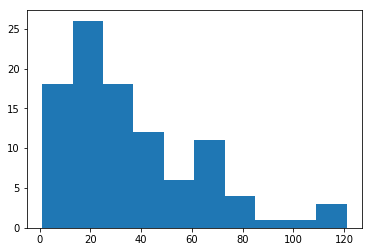

In [51]:
plt.hist(df['length_path']);

In [52]:
df['length_path'].describe()

count    100.000000
mean      35.660000
std       26.545262
min        1.000000
25%       14.000000
50%       28.000000
75%       50.500000
max      121.000000
Name: length_path, dtype: float64

In [53]:
df[df['length_path'] == 1][['url', 'path']]

,url,path
6824131,https://shop.catalog-on-demand.com/?product_ca...,/
5306950,https://www.centrohipnosisamets.com/,/
4725806,https://search.cctv.com/?qtext=%E8%82%B2%E9%BE%84,/


Note that when there is no path, this return '/' (with a length of 1). To be correct, could/should subtract 1 from length_path

### Num dots

In [54]:
df['path_dot_cnt'] = df['path'].apply(lambda x: x.count('.'))

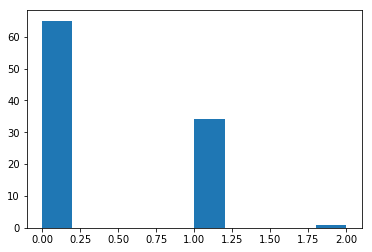

In [55]:
plt.hist(df['path_dot_cnt']);

## Query

In [ ]:
test_url = df.sample()['url'].values[0]
test_url

In [56]:
QUERY_REGEX = re.compile(r"\?([a-z0-9\-._~%!$&'()*+,;=:@/]*)#?")

In [213]:
re.match(QUERY_REGEX, test_url)

In [215]:
re.findall(QUERY_REGEX, test_url)

['_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11']

In [216]:
re.search(QUERY_REGEX, test_url)

<_sre.SRE_Match object; span=(94, 140), match='?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'>

In [249]:
test_url = df.loc[2499166, 'url']
test_url

'https://auction.catawiki.com/auctions/autobidding?auction_id=257435&lot_id=28724703'

In [251]:
re.match(QUERY_REGEX, test_url)

In [244]:
re.search(QUERY_REGEX, test_url).group(0)

'?auction_id=257435&lot_id=28724703'

In [240]:
re.findall(QUERY_REGEX, test_url)

['auction_id=257435&lot_id=28724703']

When there is no query, this approach won't work, as `re.search` returns `None`

In [57]:
test_url = df.sample()['url'].values[0]
test_url

'https://www.casamundo.com/rekreacni-domy/belgie/vychodni-flandry/moerbeke-waas'

In [59]:
print(re.search(QUERY_REGEX, test_url))

None


In [60]:
# I couldn't get this to work
# df['query_stg'] = df['url'].apply(lambda x: re.search(QUERY_REGEX, x))
# df['query'] = np.where(~df['query_stg'].isna(),
#                        df['query_stg'].apply(lambda x: x.group(0)),
#                        None)

In [272]:
def get_query(url):
    try: 
        return re.search(QUERY_REGEX, url).group(0)
    except AttributeError:
        return None

In [274]:
df['query'] = df['url'].apply(get_query)

In [275]:
df[['url', 'query_stg', 'query']].head()

,url,query_stg,query
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,None,None
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,"<_sre.SRE_Match object; span=(94, 140), match=...",?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,None,None
2499166,https://auction.catawiki.com/auctions/autobidd...,"<_sre.SRE_Match object; span=(49, 83), match='...",?auction_id=257435&lot_id=28724703
2167067,https://cascadecenters.com/index.php?tray=topi...,"<_sre.SRE_Match object; span=(36, 86), match='...",?tray=topic&tid=top10572&cid=74&ordertop10590=...


## Entropy

Definition from https://rosettacode.org/wiki/Entropy

In [4]:
from collections import Counter

def shannon_specific_entropy(s):
    N = len(s)
    c = Counter(s)
    h_sum = 0
    for x, n_i in c.items():
        f_i = n_i/N
        h_sum += (f_i) * np.log2(f_i)
        
    h_sum = -h_sum
    return h_sum

In [6]:
shannon_specific_entropy('1223334444')

1.8464393446710154

In [153]:
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [154]:
shannon_specific_entropy(url)

4.627998963423238

Apply to hostname & to full URL

In [158]:
tld_extract = df.loc[5817193, 'tld_extract']
'.'.join(tld_extract)

'www.cbsnews.com'

In [159]:
df['hostname'] = df['tld_extract'].apply(lambda x: '.'.join(x))

In [160]:
df['hostname_entropy'] = df['hostname'].apply(shannon_specific_entropy)

In [162]:
df['url_entropy'] = df['url'].apply(shannon_specific_entropy)

## Hostname

In [285]:
df['hostname_dash_cnt'] = df['hostname'].apply(lambda x: x.count('-'))

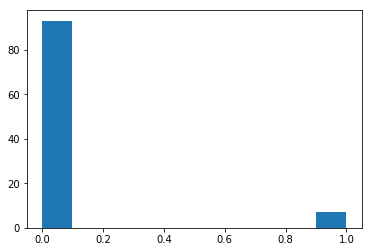

In [286]:
plt.hist(df['hostname_dash_cnt']);

## Suspicious words

This paper lists several: https://www.researchgate.net/publication/324014302_Malicious_URLs_Detection_Using_Decision_Tree_Classifiers_and_Majority_Voting_Technique


In [181]:
s = 'www.example.com/php'

s.count('php')

1

In [186]:
df['url_php_ind'] = np.where(df['url'].str.count('php') == 0, 0, 1)

In [187]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,...,query_ind,hostname,hostname_entropy,url_entropy,special_char_cnt,reserced_char_cnt,reserved_char_cnt,url_digit_cnt,url_php,url_php_ind
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,...,0,catused.cat.com,3.189898,4.749386,0,8,8,18,0,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,...,1,www.cbssports.com,3.175123,4.851127,0,23,23,14,0,0
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,...,0,www.cbsnews.com,2.973557,4.297062,0,6,6,0,0,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,...,1,auction.catawiki.com,3.308695,4.559759,0,9,9,14,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,...,1,.cascadecenters.com,3.260828,4.666683,6,38,38,83,1,1


In [188]:
SUSPICIOUS_WORDS = ['php', 'abuse', 'admin', 'verification']

for word in SUSPICIOUS_WORDS:
    col_name = word + '_ind'
    df[col_name] = np.where(df['url'].str.count(word) == 0, 0, 1)